# Análise Exploratória de Dados

### Integrantes
- Carlos Henrique de Godoy Santos 2°G N°1
- Murilo de Oliveira Moreira 2°G N°15

### Objetivo da Análise

Está analise tem como objetivo detalhar e intepretar os registros de foco de queimadas em todo o Brasil - 2022/2023.

Nosso aplicativo é focado em incentivar e educar jovens no Brasil sobre sustentabilidade e ESG. Com o aumento de problemas ambientais como desmatamento, queimadas, poluição de rios e do ar, nosso objetivo é ensinar e conscientizar os jovens sobre a importância de proteger e preservar o meio ambiente. Neste contexto, farei uma análise de uma base de dados sobre focos de queimadas no Brasil, destacando a urgência da conscientização ambiental no país e mostrando como esses dados reforçam a necessidade de uma educação voltada à sustentabilidade.

URL da base: https://terrabrasilis.dpi.inpe.br/queimadas/portal/

### <center>Importações<center>

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium

### <center>Lendo os DataFrame respectivo para cada ano<center>

In [72]:
# Carregando dois DataFrames, cada um contendo dados de um ano específico (2022 e 2023)
df_2022 = pd.read_csv('Registros2022.csv')
df_2023 = pd.read_csv('Registros2023.csv')

### <center>Concatenando as duas bases em uma só<center>

In [73]:
# Concatenando os dois DataFrames para consolidar todos os registros em um único conjunto de dados.
df_Geral = pd.concat([df_2022, df_2023])
df_Geral

,id_bdq,foco_id,lat,lon,data_pas,pais,estado,municipio,bioma
0,1573831549,a051ae23-19a8-32ae-9c5f-420da79f2c45,4.22817,-60.18431,2022-01-11 17:15:00,Brasil,RORAIMA,UIRAMUTÃ,Amazônia
1,1573831670,56c8bf05-f851-3f3c-b879-a9b4ae9efbf5,-4.21541,-54.90501,2022-01-11 17:13:00,Brasil,PARÁ,RURÓPOLIS,Amazônia
2,1573831700,64760840-cbce-3b3f-9091-d41593635774,-2.17804,-53.71971,2022-01-11 17:13:00,Brasil,PARÁ,PRAINHA,Amazônia
3,1573831699,9e85bfd3-75cb-3087-9ed1-9f0b900ed792,0.71377,-59.81431,2022-01-11 17:13:00,Brasil,RORAIMA,SÃO JOÃO DA BALIZA,Amazônia
4,1574047185,2fb78c50-6110-3ea6-9ca4-4fa8adffcfd7,-28.56226,-51.36904,2022-01-13 16:54:00,Brasil,RIO GRANDE DO SUL,MUITOS CAPÕES,Mata Atlântica
...,...,...,...,...,...,...,...,...,...
189896,1641122094,1dfe589f-34ad-3504-a2b4-9af581f5736c,-6.93483,-59.52313,2023-07-27 18:02:00,Brasil,AMAZONAS,APUÍ,Amazônia
189897,1641122095,7fe741d3-a7f7-38d8-b0ed-6fef74a97851,-6.93405,-59.56060,2023-07-27 18:02:00,Brasil,AMAZONAS,APUÍ,Amazônia
189898,1641122096,ba348797-6399-335d-afd4-b9700b13ffe0,-6.93259,-59.55067,2023-07-27 18:02:00,Brasil,AMAZONAS,APUÍ,Amazônia
189899,1641122097,12949328-c8ca-3889-89a8-e5ca6b2051ac,-6.93112,-59.54064,2023-07-27 18:02:00,Brasil,AMAZONAS,APUÍ,Amazônia


### <center>Análise do DataFrame bruto (pré-normalização) e visualização de gráficos para facilitar a interpretação. Essa análise nos permite observar as estatísticas de cada coluna e a distribuição dos dados, ajudando a identificar quais informações serão úteis para a análise final.</center>

In [ ]:
# Informações básicas do dataset (Total de linhas e colunas)
print(f'Dataset contém {df_Geral.shape[0]} linhas e {df_Geral.shape[1]} colunas')
 
# Estatísticas descritivas para variáveis numéricas
print('\nEstatísticas descritivas para variáveis numéricas (id_bdq/lat/lon):')
display(df_Geral.describe())
 
# Estatísticas descritivas para variáveis categóricas
print('\nEstatísticas descritivas para variáveis categóricas:')
display(df_Geral.describe(include='O'))
 
# Análise de frequências para variáveis categóricas
categorical_columns = df_Geral.select_dtypes(include=['object']).columns
 
# Visualização: Gráfico de barras para as variáveis categóricas mais importantes
plt.figure(figsize=(12, 8))
 
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    df_Geral[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição de {column}')
    plt.xticks(rotation=45)
 
plt.tight_layout()
plt.show()
 

Dataset contém 390664 linhas e 9 colunas

Estatísticas descritivas para variáveis numéricas (id_bdq/lat/lon):


,id_bdq,lat,lon
count,3.906640e+05,390664.000000,390664.000000
mean,1.624126e+09,-8.990069,-52.314900
std,2.658550e+07,5.668774,8.257778
min,1.572806e+09,-33.740460,-73.647190
25%,1.599497e+09,-11.421267,-57.670372
50%,1.612426e+09,-8.380040,-51.303350
75%,1.651218e+09,-5.016258,-45.518510
max,1.666020e+09,5.139550,-34.825430



Estatísticas descritivas para variáveis categóricas:


,foco_id,data_pas,pais,estado,municipio,bioma
count,390664,390664,390664,390664,390664,390664
unique,390664,4596,1,27,4485,6
top,a051ae23-19a8-32ae-9c5f-420da79f2c45,2022-08-22 17:39:00,Brasil,PARÁ,ALTAMIRA,Amazônia
freq,1,3344,390664,83136,8594,213672


## Analisando os gráficos gerados acima: 

### foco_id: Esse ID, por ser um código extenso, poluiu os valores do eixo X. Ele é apenas o segundo identificador que existe na tabela, e, na minha análise, não faz sentido mantê-lo. Portanto, será removido durante o processamento (normalização) da base.

### data_pas: Essa coluna contém tanto a data quanto a hora, e existem problemas com isso, já que há uma grande quantidade de datas únicas devido à inclusão de minutos. Isso não seria tão interessante para plotar gráficos e analisar a tendência de crescimento ao longo do tempo. Assim, para focar a análise em mês e ano, vou dividir a data para manter apenas o dia, mês e ano.

### pais: Como a base que estou analisando contém apenas dados brasileiros, ela só inclui o país "Brasil". No entanto, acho interessante mantê-la para que, futuramente, se eu adicionar novas bases com outros países, a análise fique mais dinâmica e os gráficos mostrem claramente que os dados são do Brasil.

### estado: Nada será alterado no processamento (normalização) da base. A análise dessa coluna será realizada futuramente.

### municipio: Nada será alterado no processamento (normalização) da base. A análise dessa coluna será realizada futuramente.

### bioma:  Nada será alterado no processamento (normalização) da base. A análise dessa coluna será realizada futuramente.



### <center>Processo de normalização do Dataframe<center>

In [ ]:
# splitando a coluna a coluna "data_pas" para obter somente a data.
df_Geral[['Data', 'Hora']] = df_Geral['data_pas'].str.split(' ', expand=True)

# Excluindo a coluna "foco_id, data_pas, Hora", pois não precisamos de dois identificador diferente.
df_Geral = df_Geral.drop(axis=0, columns='foco_id')

df_Geral = df_Geral.drop(axis=0, columns='data_pas')

df_Geral = df_Geral.drop(axis=0, columns='Hora')


# Dicionário com os estados brasileiros e suas respectivas regiões
regioes = {
    'ACRE': 'Norte', 'AMAPÁ': 'Norte', 'AMAZONAS': 'Norte', 'PARÁ': 'Norte', 'RONDÔNIA': 'Norte', 'RORAIMA': 'Norte', 'TOCANTINS': 'Norte',
    'ALAGOAS': 'Nordeste', 'BAHIA': 'Nordeste', 'CEARÁ': 'Nordeste', 'MARANHÃO': 'Nordeste', 'PARAÍBA': 'Nordeste', 'PERNAMBUCO': 'Nordeste',
    'PIAUÍ': 'Nordeste', 'RIO GRANDE DO NORTE': 'Nordeste', 'SERGIPE': 'Nordeste',
    'DISTRITO FEDERAL': 'Centro-Oeste', 'GOIÁS': 'Centro-Oeste', 'MATO GROSSO': 'Centro-Oeste', 'MATO GROSSO DO SUL': 'Centro-Oeste',
    'ESPÍRITO SANTO': 'Sudeste', 'MINAS GERAIS': 'Sudeste', 'RIO DE JANEIRO': 'Sudeste', 'SÃO PAULO': 'Sudeste',
    'PARANÁ': 'Sul', 'RIO GRANDE DO SUL': 'Sul', 'SANTA CATARINA': 'Sul'
}

df_Geral['Regiao'] = df_Geral['estado'].map(regioes)

# Reorganizando as ordens do DF para facilitar a visualização
nova_ordem = ['id_bdq', 'Data', 'pais', 'Regiao','estado', 'municipio', 'bioma', 'lat', 'lon']

# Reorganizando o DataFrame com a nova ordem
df_Geral = df_Geral[nova_ordem]

# Renomendo as colunas para nomes mais objetivos.
# Dicionário para renomear as colunas
novo_nome_colunas = {
    'id_bdq': 'ID',
    'Data': 'Data',
    'pais': 'Pais',
    'regiao': 'Regiao',
    'estado': 'Estado',
    'municipio': 'Municipio',
    'bioma': 'Bioma',
    'lat': 'Latitude',
    'lon': 'Longitude'
}

# Renomeando as colunas
df_Geral = df_Geral.rename(columns=novo_nome_colunas)

# Mostrando o DF
df_Geral



,ID,Data,Pais,Regiao,Estado,Municipio,Bioma,Latitude,Longitude
0,1573831549,2022-01-11,Brasil,Norte,RORAIMA,UIRAMUTÃ,Amazônia,4.22817,-60.18431
1,1573831670,2022-01-11,Brasil,Norte,PARÁ,RURÓPOLIS,Amazônia,-4.21541,-54.90501
2,1573831700,2022-01-11,Brasil,Norte,PARÁ,PRAINHA,Amazônia,-2.17804,-53.71971
3,1573831699,2022-01-11,Brasil,Norte,RORAIMA,SÃO JOÃO DA BALIZA,Amazônia,0.71377,-59.81431
4,1574047185,2022-01-13,Brasil,Sul,RIO GRANDE DO SUL,MUITOS CAPÕES,Mata Atlântica,-28.56226,-51.36904
...,...,...,...,...,...,...,...,...,...
995,1574047165,2022-01-13,Brasil,Norte,RORAIMA,NORMANDIA,Amazônia,4.01926,-60.20508
996,1574047166,2022-01-13,Brasil,Sudeste,MINAS GERAIS,FRUTAL,Cerrado,-20.12414,-49.12563
997,1574047169,2022-01-13,Brasil,Sudeste,SÃO PAULO,IPUÃ,Cerrado,-20.46666,-48.07172
998,1574047170,2022-01-13,Brasil,Centro-Oeste,MATO GROSSO DO SUL,NOVA ALVORADA DO SUL,Cerrado,-21.75149,-53.93510


### <center> Este código utiliza a biblioteca Folium para criar um mapa interativo que mostra visualmente a localização de cada foco de queimada registrado na base de dados. Abaixo estão os detalhes do que cada parte do código realiza:

Definir o Centro do Mapa: O mapa é centralizado no ponto médio das coordenadas de latitude e longitude dos focos de queimada, garantindo uma visão mais ampla do Brasil e facilitando a visualização de todos os pontos.

Adicionar Marcadores: Cada foco de queimada é representado por um marcador circular no mapa. Estes marcadores usam:

Cor Vermelha para o contorno, simbolizando fogo.
Preenchimento Laranja com leve transparência, indicando a intensidade das queimadas e permitindo observar sobreposição de pontos próximos.
Personalizar Aparência dos Marcadores: A transparência (fill_opacity=0.6) e o tamanho (radius=5) ajudam a visualizar bem os pontos, especialmente em áreas onde há concentrações elevadas de queimadas.<center>

In [ ]:
# Definindo o centro do mapa como o ponto médio das coordenadas para focar no Brasil
latitude_central = df_Geral['Latitude'].mean()
longitude_central = df_Geral['Longitude'].mean()

# Criando o mapa centrado no ponto médio das coordenadas
mapa = folium.Map(location=[latitude_central, longitude_central], zoom_start=5)

# Adicionando marcadores para cada foco de queimada registrado
for lat, lon in zip(df_Geral['Latitude'], df_Geral['Longitude']):
    folium.CircleMarker(
        location=[lat, lon],
        # Tamanho do marcador
        radius=5,         
        # Cor do círculo
        color="red",           
        fill=True,
        # Cor do preenchimento
        fill_color="orange",  
        # Transparência  
        fill_opacity=0.6       
    ).add_to(mapa)

# Exibindo o mapa 
mapa


###  <center> Após analisar visualmente os pontos de queimadas, esta análise ajuda a quantificar a contribuição de cada região, estado, município e bioma. <center>

In [ ]:
# Análise de diversidade nos dados: regiões, estados, municípios e biomas

# Obtendo valores únicos e contagem para cada categoria
Regioes = df_Geral['Regiao'].unique()
QuantidadeRegioes = df_Geral['Regiao'].nunique()

Estados = df_Geral['Estado'].unique()
QuantidadeEstados = df_Geral['Estado'].nunique()

Municipios = df_Geral['Municipio'].unique()
QuantidadeMunicipios = df_Geral['Municipio'].nunique()

Biomas = df_Geral['Bioma'].unique()
QuantidadeBiomas = df_Geral['Bioma'].nunique()

# Exibindo os resultados
print("Diversidade de Regiões, Estados, Municípios e Biomas nos Dados")
print("---------------------------------------------------------------")
print(f"Regiões ({QuantidadeRegioes}):", Regioes)
print(f"\nEstados ({QuantidadeEstados}):", Estados)
print(f"\nMunicípios ({QuantidadeMunicipios}):", Municipios)
print(f"\nBiomas ({QuantidadeBiomas}):", Biomas)


Diversidade de Regiões, Estados, Municípios e Biomas nos Dados
---------------------------------------------------------------
Regiões (5): ['Norte' 'Sul' 'Nordeste' 'Centro-Oeste' 'Sudeste']

Estados (24): ['RORAIMA' 'PARÁ' 'RIO GRANDE DO SUL' 'BAHIA' 'MARANHÃO'
 'RIO GRANDE DO NORTE' 'AMAZONAS' 'PARAÍBA' 'PERNAMBUCO' 'PIAUÍ'
 'MATO GROSSO DO SUL' 'MATO GROSSO' 'RONDÔNIA' 'ACRE' 'MINAS GERAIS'
 'SANTA CATARINA' 'PARANÁ' 'ALAGOAS' 'CEARÁ' 'GOIÁS' 'SÃO PAULO'
 'TOCANTINS' 'SERGIPE' 'ESPÍRITO SANTO']

Municípios (370): ['UIRAMUTÃ' 'RURÓPOLIS' 'PRAINHA' 'SÃO JOÃO DA BALIZA' 'MUITOS CAPÕES'
 'RIO REAL' 'SANTO AMARO DO MARANHÃO' 'GARRAFÃO DO NORTE' 'PENALVA'
 'SANTANA DO MATOS' 'FORTALEZA DOS VALOS' 'MANICORÉ' 'MAÇAMBARÁ'
 'MUQUÉM DO SÃO FRANCISCO' 'BARREIRAS' 'SÃO DESIDÉRIO' 'BONFIM' 'BREJO'
 'CAXIAS' 'PIRAPEMAS' 'SÃO MIGUEL DO GOSTOSO' 'CAJAZEIRAS' 'GOIANA'
 'TUTÓIA' 'SEBASTIÃO LEAL' 'CURRAIS' 'BURITI' 'CORUMBÁ' 'GAÚCHA DO NORTE'
 'ROSÁRIO DO SUL' 'GUAJARÁ-MIRIM' 'CANUTAMA' 'NAVIRAÍ' 'XAP

### <center>Esses gráficos de barras mostram a distribuição da contagem de pontos de queimadas agrupados por Região, Estado, Bioma e Município. Ao analisar a frequência em cada uma dessas categorias, conseguimos identificar quais áreas são mais afetadas por focos de queimadas. Cada gráfico apresenta a quantidade total de ocorrências para cada valor único dentro da categoria, destacando as principais áreas de concentração ao longo dos dados. <center>

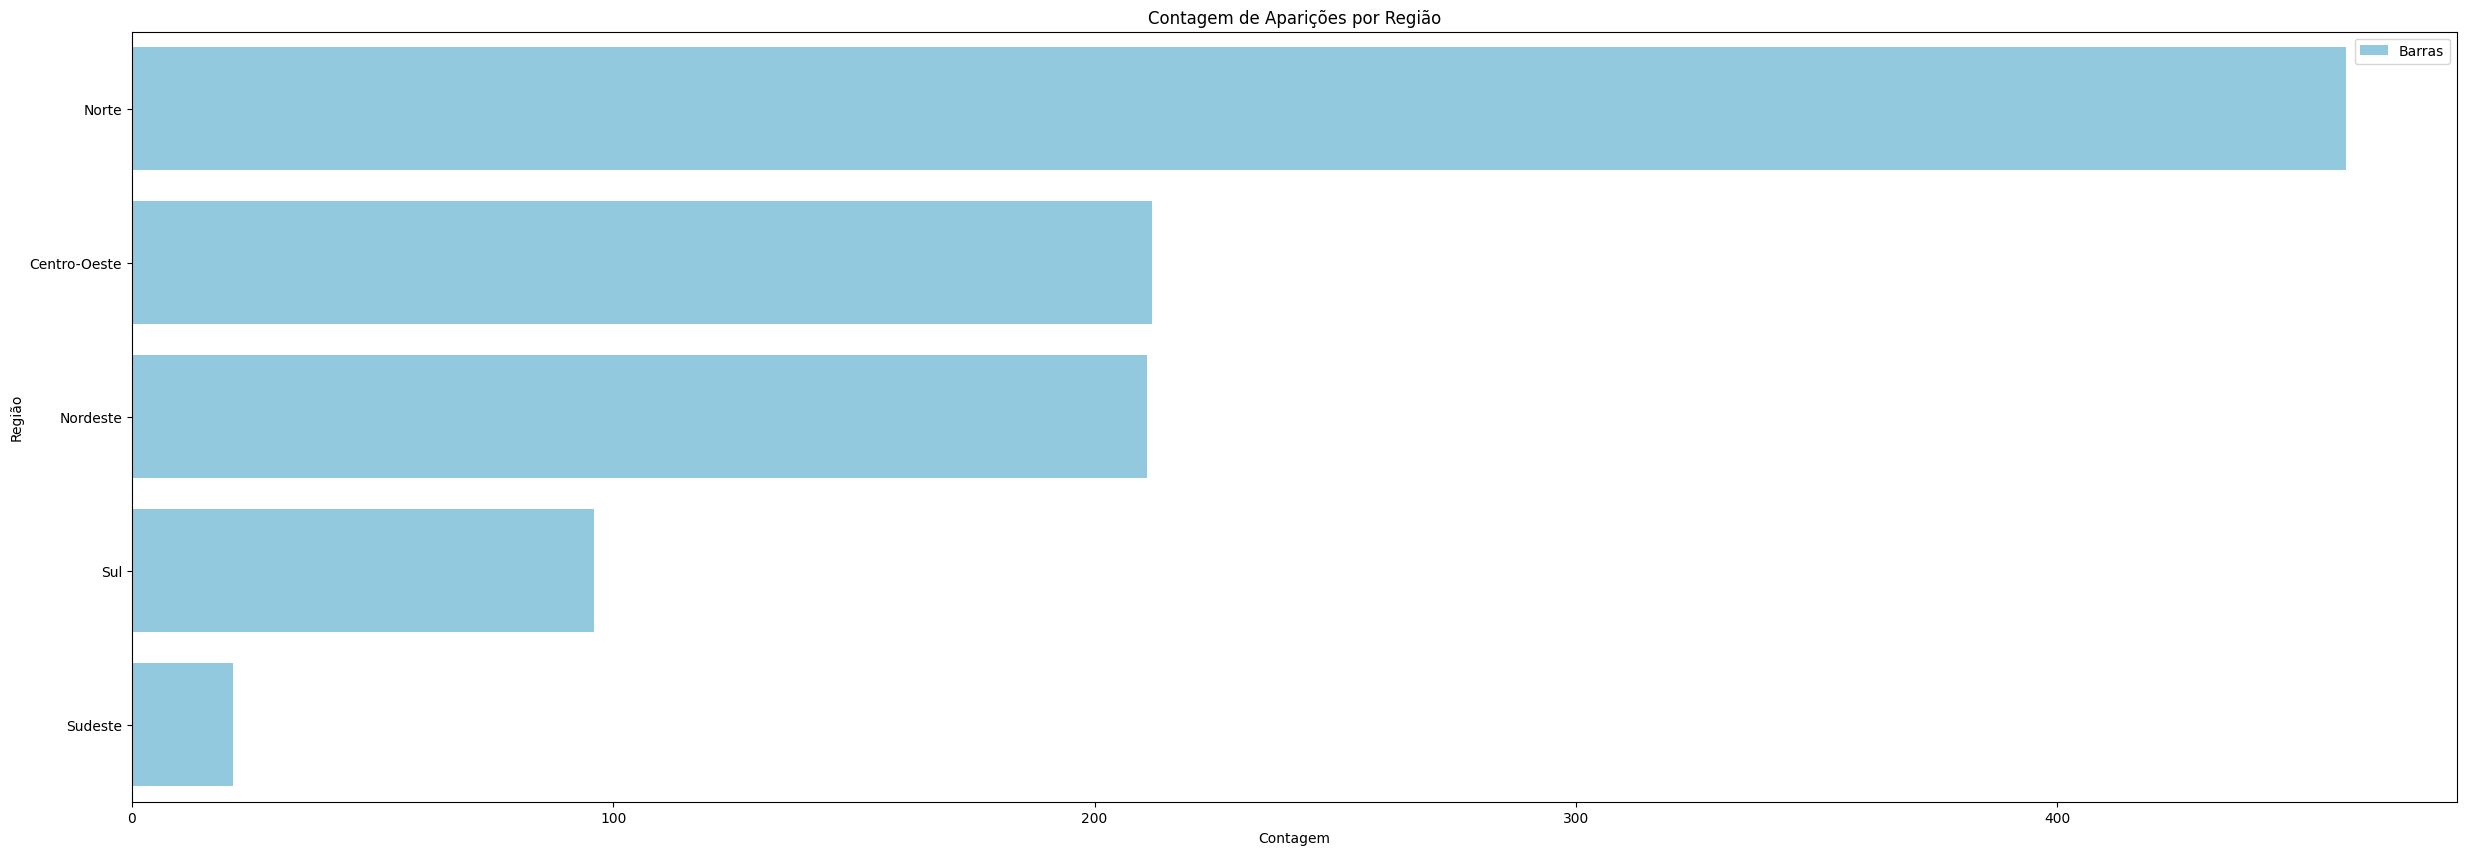

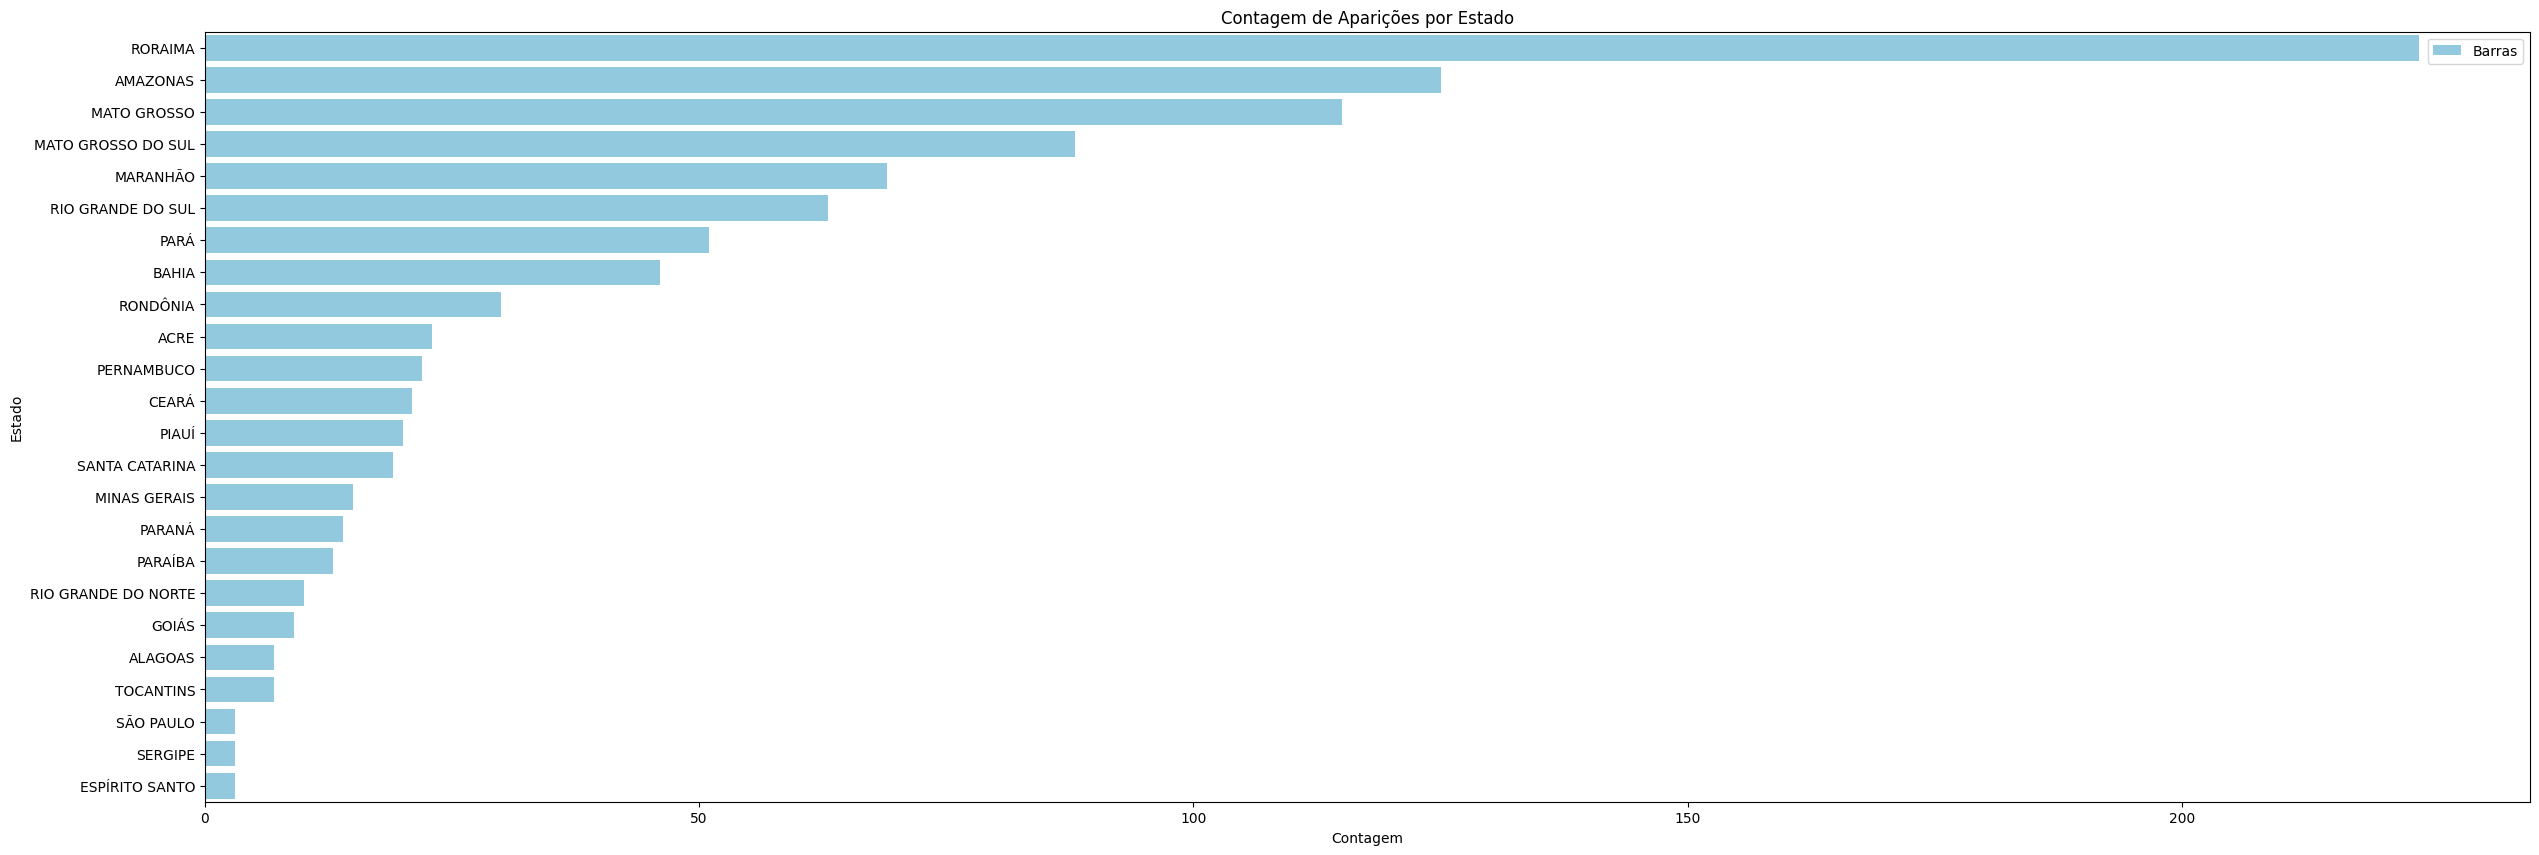

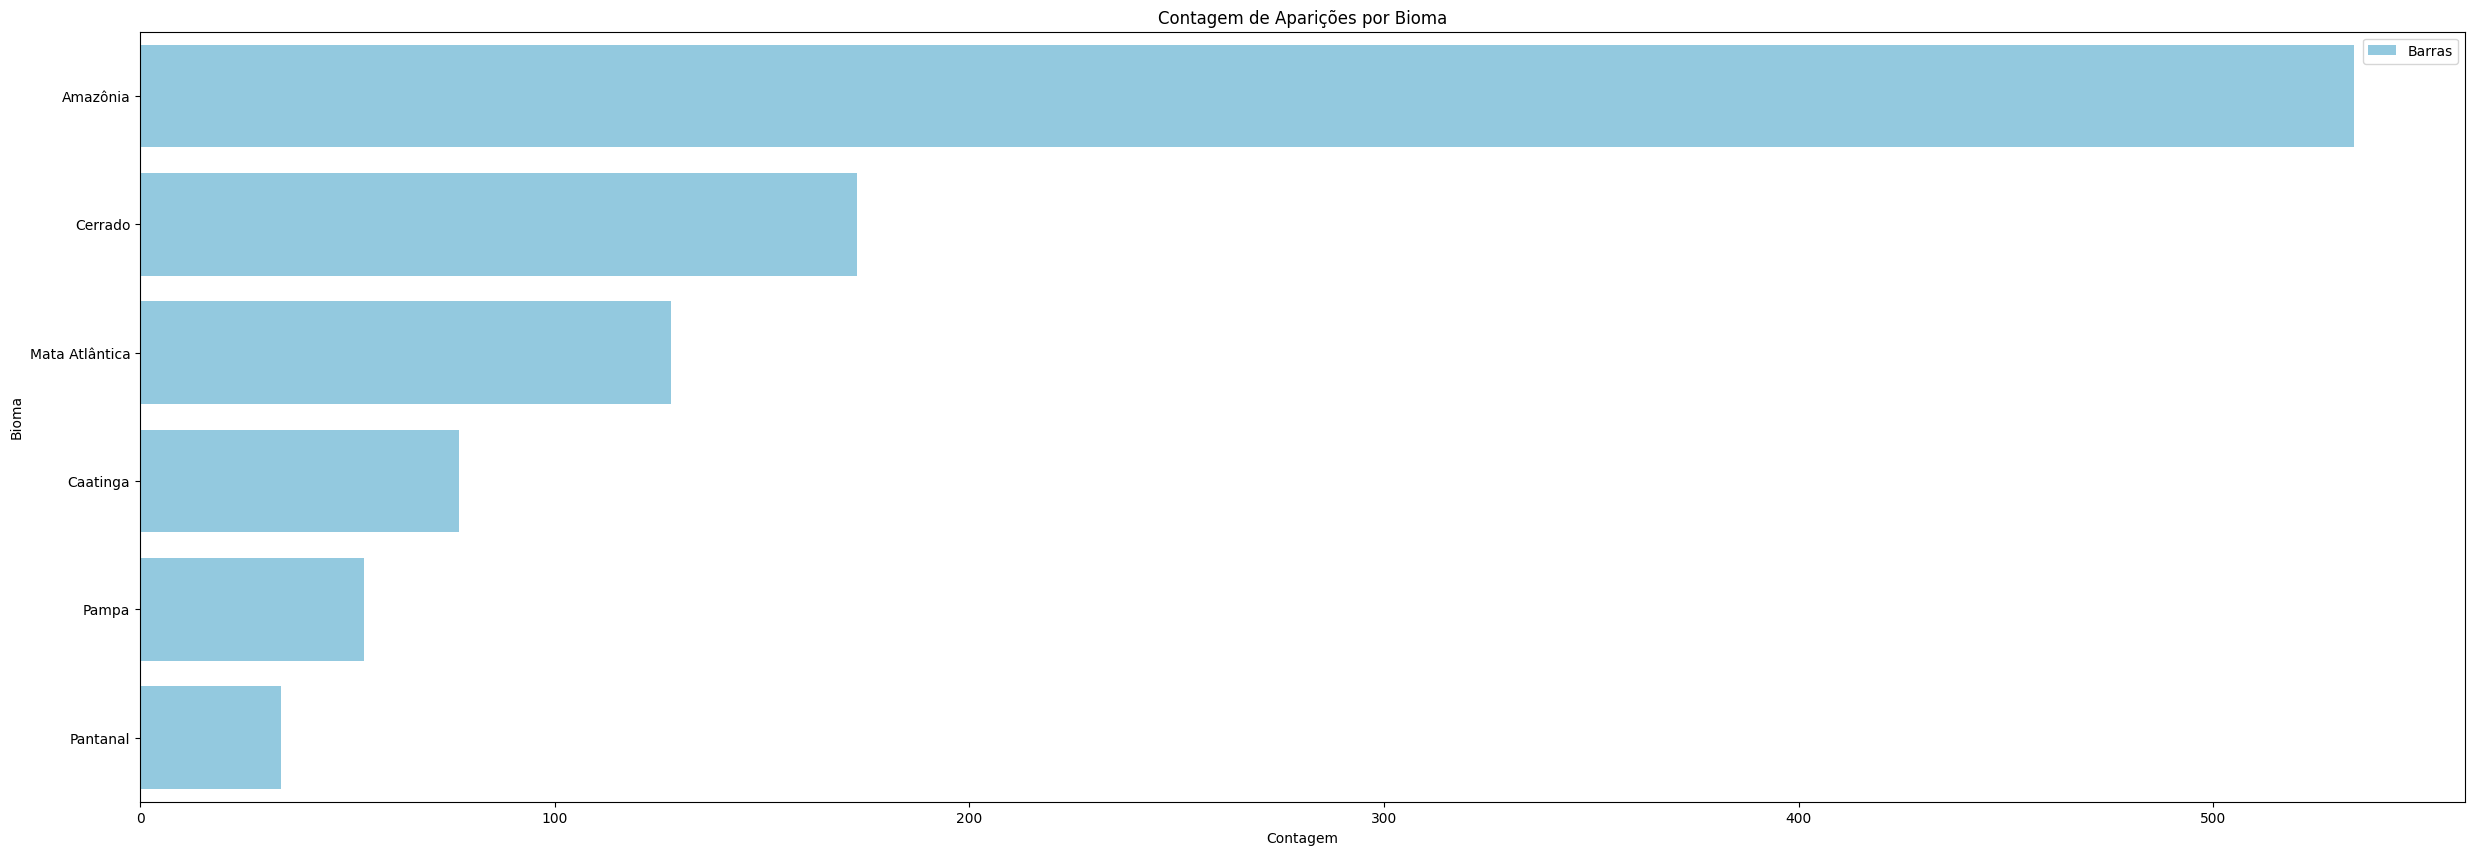

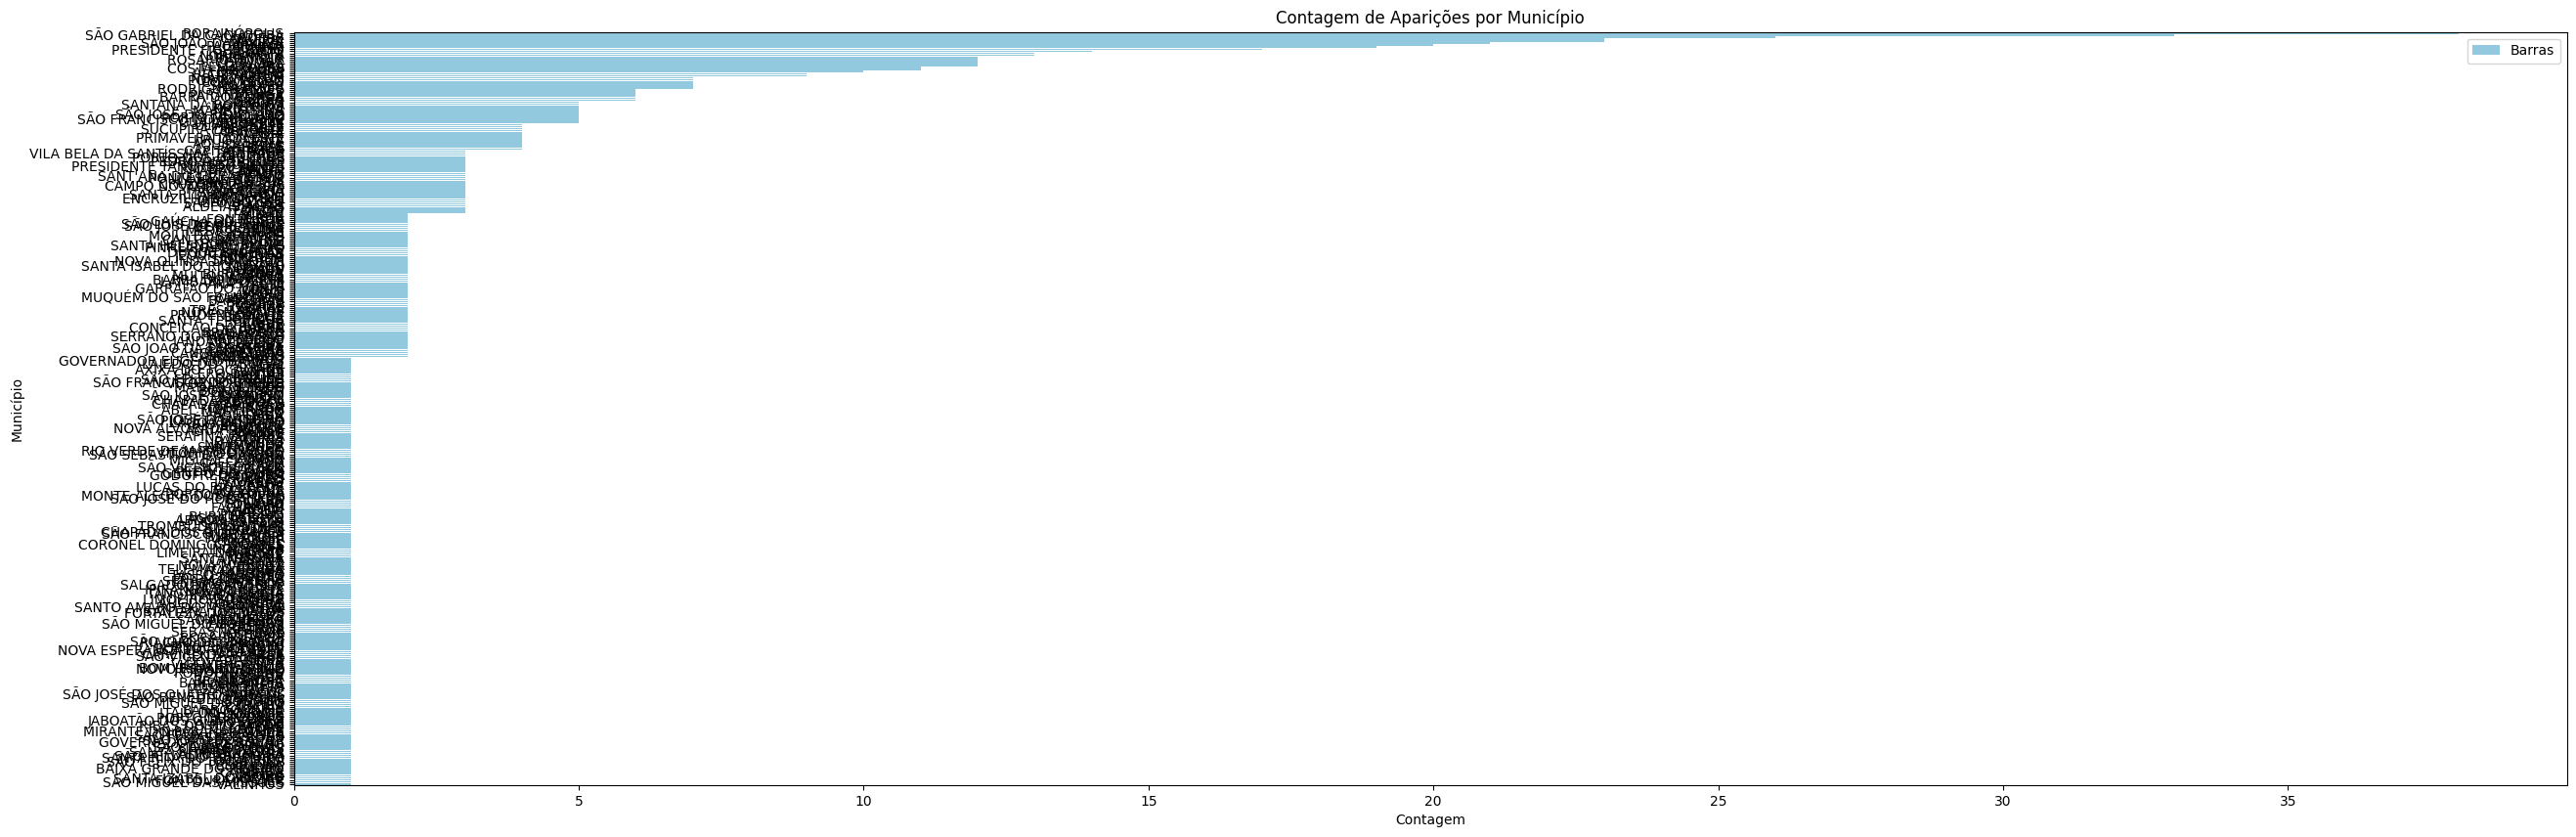

In [ ]:
# Contando a frequência de cada Região
regiao_counts = df_Geral['Regiao'].value_counts().reset_index()
regiao_counts.columns = ['Regiao', 'Contagem']

# Configurando o tamanho do gráfico para Região
plt.figure(figsize=(30, 10))

# Gráfico de barras com contagem de cada Região
sns.barplot(x='Contagem', y='Regiao', data=regiao_counts, color='skyblue', label='Barras')
plt.xlabel("Contagem")
plt.ylabel("Região")
plt.title("Contagem de Aparições por Região")
plt.legend()

# Contando a frequência de cada Estado
estado_counts = df_Geral['Estado'].value_counts().reset_index()
estado_counts.columns = ['Estado', 'Contagem']

# Configurando o tamanho do gráfico para Estado
plt.figure(figsize=(30, 10))

# Gráfico de barras com contagem de cada Estado
sns.barplot(x='Contagem', y='Estado', data=estado_counts, color='skyblue', label='Barras')
plt.xlabel("Contagem")
plt.ylabel("Estado")
plt.title("Contagem de Aparições por Estado")
plt.legend()

# Contando a frequência de cada Bioma
bioma_counts = df_Geral['Bioma'].value_counts().reset_index()
bioma_counts.columns = ['Bioma', 'Contagem']

# Configurando o tamanho do gráfico para Bioma
plt.figure(figsize=(30, 10))

# Gráfico de barras com contagem de cada Bioma
sns.barplot(x='Contagem', y='Bioma', data=bioma_counts, color='skyblue', label='Barras')
plt.xlabel("Contagem")
plt.ylabel("Bioma")
plt.title("Contagem de Aparições por Bioma")
plt.legend()

# Contando a frequência de cada Município
municipio_counts = df_Geral['Municipio'].value_counts().reset_index()
municipio_counts.columns = ['Municipio', 'Contagem']

# Configurando o tamanho do gráfico para Município
plt.figure(figsize=(30, 10))

# Gráfico de barras com contagem de cada Município
sns.barplot(x='Contagem', y='Municipio', data=municipio_counts, color='skyblue', label='Barras')
plt.xlabel("Contagem")
plt.ylabel("Município")
plt.title("Contagem de Aparições por Município")
plt.legend()

# Exibindo os gráficos
plt.show()


## Analise dos gráficos:

A predominância das queimadas na região Norte do Brasil, especialmente nos estados de Roraima e Amazonas e no bioma Amazônia, é impulsionada principalmente pelo desmatamento e pela expansão da agropecuária. Nessas áreas, as queimadas são utilizadas para “limpar” as terras após o desmatamento, facilitando o uso para pecuária e agricultura, atividades economicamente fortes na região. Esse ciclo de desmatamento e queimadas intensifica-se na estação seca, aumentando drasticamente os focos de incêndio na Amazônia. Esse processo não só ameaça a biodiversidade como também gera problemas respiratórios na população local, devido à emissão de partículas finas que afetam a qualidade do ar.


Para essa analise foi feita uma pesquisa nos sites abaixo: 

https://www.preparaenem.com/geografia/queimadas-na-amazonia.htm

https://www.greenpeace.org/brasil/imprensa/numero-de-queimadas-na-amazonia-em-2024-ja-e-o-maior-para-o-periodo-em-quase-duas-decadas/

https://terrabrasilis.dpi.inpe.br/queimadas/portal/

https://www.wwf.org.br/natureza_brasileira/areas_prioritarias/amazonia1/ameacas_riscos_amazonia/desmatamento_na_amazonia/agropecuaria_na_amazonia/

https://agencia.fiocruz.br/queimadas-na-amazonia-aumentam-problemas-respiratorios

### Conclusão

A análise realizada sobre os registros de focos de queimadas no Brasil entre 2022 e 2023 revela a gravidade da situação ambiental no país e destaca a necessidade urgente de ações de conscientização e educação voltadas à sustentabilidade. Ao explorar a base de dados, observamos não apenas a distribuição geográfica e temporal das queimadas, mas também os fatores subjacentes que contribuem para esse fenômeno, como o desmatamento e a expansão da agropecuária, especialmente nas regiões Norte e no bioma Amazônia.

Compreender a correlação entre as queimadas e suas causas é fundamental para fomentar a conscientização sobre os impactos ambientais, não apenas para a biodiversidade, mas também para a saúde das comunidades locais. A análise destaca que as queimadas não são apenas um problema ambiental, mas também um desafio social e econômico que requer soluções integradas. Portanto, o nosso compromisso em educar e mobilizar a juventude em torno da proteção ambiental é mais relevante do que nunca.

Em suma, essa análise não é apenas um retrato dos dados, mas um chamado à ação para todos nós. Ao capacitar os jovens com conhecimento e ferramentas para entender e abordar essas questões, podemos fomentar uma nova geração de defensores do meio ambiente, prontos para enfrentar os desafios que o Brasil enfrenta em termos de sustentabilidade e conservação.